In [ ]:
!pip install wfdb
!pip install spectrum

In [26]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from spectrum import *
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [51]:
def report_acc_cv(clf, X, y, model_name, cv=10):    
    metrics = cross_validate(clf, X, y, cv=cv, scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'])
    
    fit_time = metrics['fit_time']
    score_time = metrics['score_time']
    acc = metrics['test_accuracy']
    accb = metrics['test_balanced_accuracy']
    f1 = metrics['test_f1']
    p = metrics['test_precision']
    r = metrics['test_recall']
    
    print("Metrics for " + model_name)
    print("\n fit_time is: %.2f s +- %.2f s" %(np.mean(fit_time),np.std(fit_time)))
    print(" score_time is: %.2f s +- %.2f s\n" %(np.mean(score_time),np.std(score_time)))
    print(" accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))
    print(" balanced accuracy is: %.2f%% +- %.2f%%" %(np.mean(accb)*100,np.std(accb)*100))
    print(" f1-score is: %.2f%% +- %.2f%%" %(np.mean(f1)*100,np.std(f1)*100))
    print(" precision is: %.2f%% +- %.2f%%" %(np.mean(p)*100,np.std(p)*100))
    print(" recall is: %.2f%% +- %.2f%%" %(np.mean(r)*100,np.std(r)*100))

    return metrics

In [25]:
folderPath = "/content/drive/MyDrive/CHF-Datasets/bidmc-congestive-heart-failure-database-1.0.0"
file_names = ["chf01", "chf02", "chf03", "chf04", "chf05", "chf06", "chf07", "chf08",
              "chf09", "chf10", "chf11", "chf12", "chf13", "chf14", "chf15"]
n_features = 32

csv_header = ["f"+str(i) for i in range(n_features+1)] + ["label"]
csv_header = ",".join(csv_header)
data = []

for i in range(15):
    label = 1
    print("Process sample " + file_names[i])
    record = wfdb.rdsamp(os.path.join(folderPath, file_names[i]))
    signal1 = record[0][:, 0]
    for j in range(0, 100 * 1000, 1000):
        AR, rho, ref = arburg(signal1[j:j+1000], n_features)
        features = [k.real for k in AR]
        features.append(rho)
        features.append(label)
        data.append(features)

np.savetxt("chf2_final.csv", data, delimiter=",", header=csv_header, comments="")

Process sample chf01
Process sample chf02
Process sample chf03
Process sample chf04
Process sample chf05
Process sample chf06
Process sample chf07
Process sample chf08
Process sample chf09
Process sample chf10
Process sample chf11
Process sample chf12
Process sample chf13
Process sample chf14
Process sample chf15


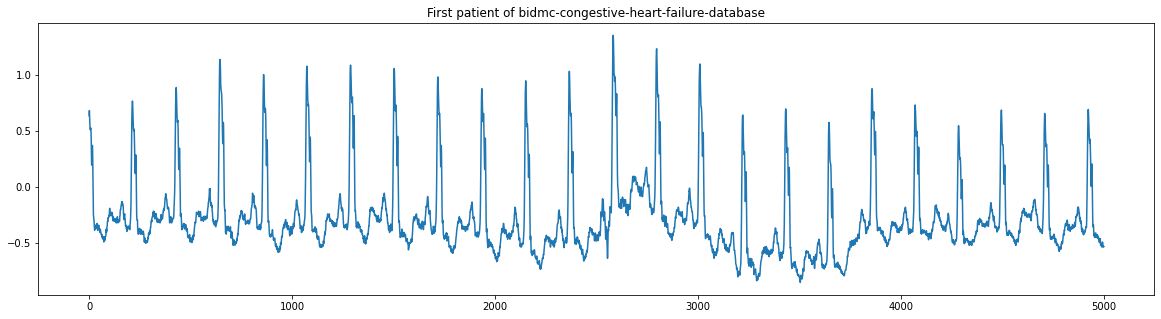

In [36]:
record = wfdb.rdsamp("/content/drive/MyDrive/CHF-Datasets/bidmc-congestive-heart-failure-database-1.0.0/chf01")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[:5000])
plt.title("First patient of bidmc-congestive-heart-failure-database")
plt.show()

In [27]:
folderPath = "/content/drive/MyDrive/CHF-Datasets/PTB Diagnostic ECG Database"
file_names = ["s0023_re", "s0183_re", "s0224_re"]
n_features = 32

csv_header = ["f"+str(i) for i in range(n_features+1)] + ["label"]
csv_header = ",".join(csv_header)
data = []

for i in range(3):
    label = 1
    print("Process sample " + file_names[i])
    record = wfdb.rdsamp(os.path.join(folderPath, file_names[i]))
    signal1 = record[0][:, 0]
    for j in range(0, len(signal1), 1000):
        AR, rho, ref = arburg(signal1[j:j+1000], n_features)
        features = [k.real for k in AR]
        features.append(rho)
        features.append(label)
        data.append(features)

np.savetxt("chf_final.csv", data, delimiter=",", header=csv_header, comments="")

Process sample s0023_re
Process sample s0183_re
Process sample s0224_re


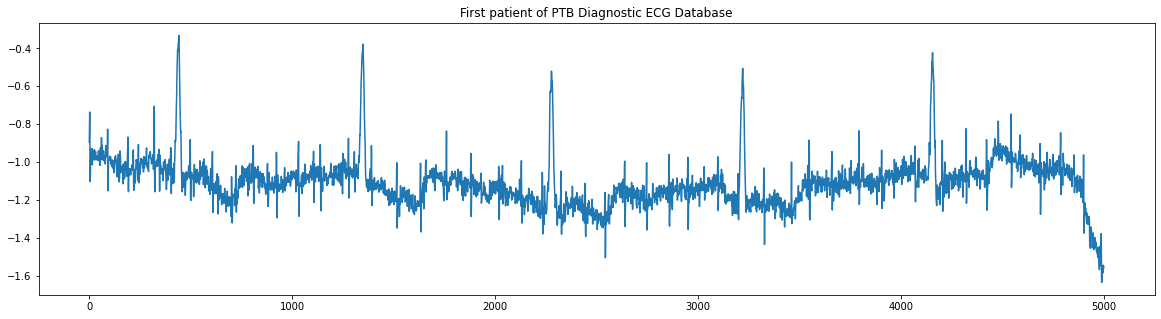

In [39]:
record = wfdb.rdsamp("/content/drive/MyDrive/CHF-Datasets/PTB Diagnostic ECG Database/s0023_re")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[:5000])
plt.title("First patient of PTB Diagnostic ECG Database")
plt.show()

In [24]:
folderPath = "/content/drive/MyDrive/CHF-Datasets/mit-bih-arrhythmia-database-1.0.0"
n_features = 32

csv_header = ["f"+str(i) for i in range(n_features + 1)] + ["label"]
csv_header = ",".join(csv_header)
data = []

for i in range(13):
    label = 0
    print("Process sample " + str(100 + i))

    # Using WFDB for reading dat final and get signal datas 
    record = wfdb.rdsamp(os.path.join(folderPath, str(100 + i)))
    signal1 = record[0][:, 0]
    signal2 = record[0][:, 1]
    for j in range(0, 100 * 1000, 1000):
        
        AR, rho, ref = arburg(signal1[j:j+1000], n_features)
        features = [k.real for k in AR]
        features.append(rho)
        features.append(label)
        data.append(features)

np.savetxt("normal_final.csv", data, delimiter=",", header=csv_header, comments="")

Process sample 100
Process sample 101
Process sample 102
Process sample 103
Process sample 104
Process sample 105
Process sample 106
Process sample 107
Process sample 108
Process sample 109
Process sample 110
Process sample 111
Process sample 112


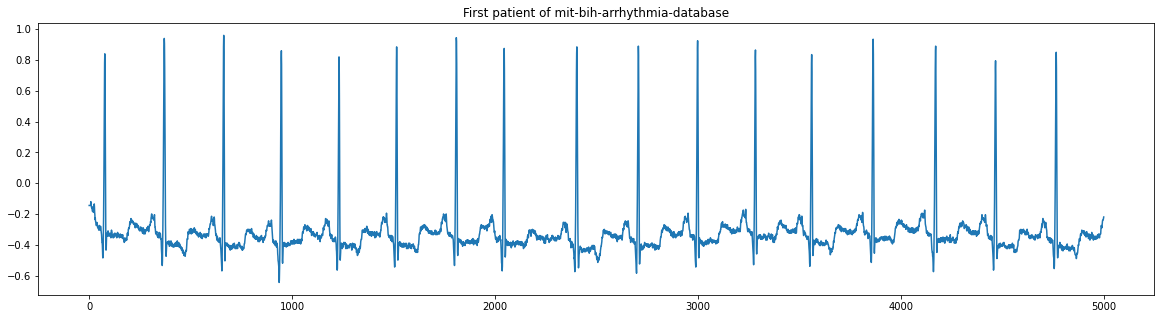

In [40]:
record = wfdb.rdsamp("/content/drive/MyDrive/CHF-Datasets/mit-bih-arrhythmia-database-1.0.0/100")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[:5000])
plt.title("First patient of mit-bih-arrhythmia-database")
plt.show()

In [44]:
chf = pd.read_csv('/content/drive/MyDrive/CHF-Datasets/chf_final.csv')
chf2 = pd.read_csv('/content/drive/MyDrive/CHF-Datasets/chf2_final.csv')
normal = pd.read_csv('/content/drive/MyDrive/CHF-Datasets/normal_final.csv')

case1_data = pd.concat([chf2, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

case2_data = pd.concat([chf, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

## Case1  (1300 + 1500 = 2800 samples)
### BIDMC congestive heart failure + MIT BIH Arrhythmia databases
### Metrics result determined in each section 

### Decision Tree(DT)

In [70]:
DTClf = DecisionTreeClassifier(max_depth=15, max_leaf_nodes=8)

DT_metrics1 = report_acc_cv(DTClf, case1_data.drop("label", axis=1), case1_data["label"], "Decision Tree", cv=10)

Metrics for Decision Tree

 fit_time is: 0.05 s +- 0.00 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 93.00% +- 1.06%
 balanced accuracy is: 93.09% +- 1.08%
 f1-score is: 93.35% +- 1.03%
 precision is: 95.06% +- 2.20%
 recall is: 91.80% +- 2.46%


### K-Nearest Neighbor(KNN)

In [71]:
KNNClf = KNeighborsClassifier(n_neighbors=3)

KNN_metrics1 = report_acc_cv(KNNClf, case1_data.drop("label", axis=1), case1_data["label"], "KNN", cv=10)

Metrics for KNN

 fit_time is: 0.01 s +- 0.00 s
 score_time is: 0.04 s +- 0.00 s

 accuracy is: 96.75% +- 1.00%
 balanced accuracy is: 96.78% +- 0.96%
 f1-score is: 96.94% +- 0.96%
 precision is: 97.51% +- 0.60%
 recall is: 96.40% +- 1.64%


### Artificial Neural Network(ANN)

In [72]:
ANNClf = MLPClassifier(hidden_layer_sizes=(10,), activation="logistic", max_iter=2000)

ANN_metrics1 = report_acc_cv(ANNClf, case1_data.drop("label", axis=1), case1_data["label"], "ANN", cv=10)

Metrics for ANN

 fit_time is: 8.12 s +- 3.66 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 96.89% +- 0.82%
 balanced accuracy is: 96.85% +- 0.87%
 f1-score is: 97.11% +- 0.74%
 precision is: 96.84% +- 1.44%
 recall is: 97.40% +- 0.63%


### Support Vector Machine(SVM)

In [73]:
from scipy.spatial.distance import pdist, cdist
from scipy.spatial.distance import squareform

def PUK_kernel(X1,X2, sigma=1.0, omega=1.0):
    if X1 is X2 :
        kernel = squareform(pdist(X1, 'sqeuclidean'))
    else:
        kernel = cdist(X1, X2, 'sqeuclidean')

    kernel = (1 + (kernel * 4 * np.sqrt(2**(1.0/omega)-1)) / sigma**2) ** omega
    kernel = 1/kernel

    return kernel

SVMClf = SVC(kernel=PUK_kernel, gamma=1, C=1)

SVM_metrics1 = report_acc_cv(SVMClf, case1_data.drop("label", axis=1), case1_data["label"], "SVM", cv=10)

Metrics for SVM

 fit_time is: 0.23 s +- 0.02 s
 score_time is: 0.03 s +- 0.00 s

 accuracy is: 98.29% +- 0.73%
 balanced accuracy is: 98.33% +- 0.72%
 f1-score is: 98.39% +- 0.69%
 precision is: 99.06% +- 0.69%
 recall is: 97.73% +- 0.90%


### Random Forest (RF)

In [74]:
RFClf = RandomForestClassifier(n_estimators=20, max_features=6)

RF_metrics1 = report_acc_cv(RFClf, case1_data.drop("label", axis=1), case1_data["label"], "RF", cv=10)

Metrics for RF

 fit_time is: 0.22 s +- 0.01 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 98.96% +- 0.41%
 balanced accuracy is: 98.97% +- 0.39%
 f1-score is: 99.03% +- 0.38%
 precision is: 99.20% +- 0.49%
 recall is: 98.87% +- 0.85%


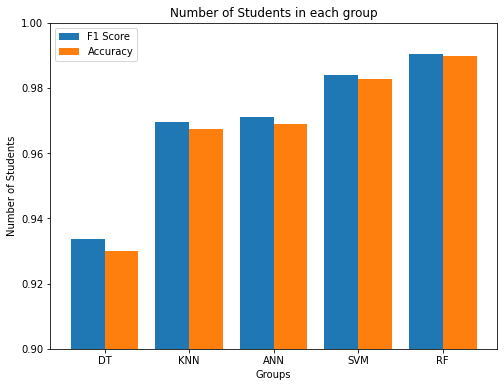

In [93]:
X = ['DT','KNN','ANN','SVM', 'RF']

f1 = [DT_metrics1['test_f1'], KNN_metrics1['test_f1'], ANN_metrics1['test_f1'],
       SVM_metrics1['test_f1'], RF_metrics1['test_f1']]
f1 = np.mean(f1, axis=1)

acc = [DT_metrics1['test_accuracy'], KNN_metrics1['test_accuracy'], ANN_metrics1['test_accuracy'],
      SVM_metrics1['test_accuracy'], RF_metrics1['test_accuracy']]
acc = np.mean(acc, axis=1)

X_axis = np.arange(len(X))
  
plt.figure(figsize=(8,6))
plt.bar(X_axis - 0.2, f1, 0.4, label = 'F1 Score')
plt.bar(X_axis + 0.2, acc, 0.4, label = 'Accuracy')


plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.ylim(0.9, 1)
plt.show()

## Case2 (1300 + 118 = 1418 samples)
### PTB Diagnostic ECG + MIT BIH Arrhythmia databases
### Metrics result determined in each section 

### Decision Tree

In [95]:
DTClf = DecisionTreeClassifier(max_depth=15, max_leaf_nodes=8)

DT_metrics2 = report_acc_cv(DTClf, case2_data.drop("label", axis=1), case2_data["label"], "Decision Tree", cv=10)

Metrics for Decision Tree

 fit_time is: 0.01 s +- 0.00 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 100.00% +- 0.00%
 balanced accuracy is: 100.00% +- 0.00%
 f1-score is: 100.00% +- 0.00%
 precision is: 100.00% +- 0.00%
 recall is: 100.00% +- 0.00%


### K-Nearest Neighbor(KNN)

In [96]:
KNNClf = KNeighborsClassifier(n_neighbors=3)

KNN_metrics2 = report_acc_cv(KNNClf, case2_data.drop("label", axis=1), case2_data["label"], "KNN", cv=10)

Metrics for KNN

 fit_time is: 0.00 s +- 0.00 s
 score_time is: 0.03 s +- 0.00 s

 accuracy is: 100.00% +- 0.00%
 balanced accuracy is: 100.00% +- 0.00%
 f1-score is: 100.00% +- 0.00%
 precision is: 100.00% +- 0.00%
 recall is: 100.00% +- 0.00%


### Artificial Neural Network(ANN)

In [97]:
ANNClf = MLPClassifier(hidden_layer_sizes=(10,), activation="logistic", max_iter=2000)

ANN_metrics2 = report_acc_cv(ANNClf, case2_data.drop("label", axis=1), case2_data["label"], "ANN", cv=10)

Metrics for ANN

 fit_time is: 1.05 s +- 0.07 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 100.00% +- 0.00%
 balanced accuracy is: 100.00% +- 0.00%
 f1-score is: 100.00% +- 0.00%
 precision is: 100.00% +- 0.00%
 recall is: 100.00% +- 0.00%


### Support Vector Machine(SVM)

In [98]:
from scipy.spatial.distance import pdist, cdist
from scipy.spatial.distance import squareform

def PUK_kernel(X1,X2, sigma=1.0, omega=1.0):
    if X1 is X2 :
        kernel = squareform(pdist(X1, 'sqeuclidean'))
    else:
        kernel = cdist(X1, X2, 'sqeuclidean')

    kernel = (1 + (kernel * 4 * np.sqrt(2**(1.0/omega)-1)) / sigma**2) ** omega
    kernel = 1/kernel

    return kernel

SVMClf = SVC(kernel=PUK_kernel, gamma=1, C=1)

SVM_metrics2 = report_acc_cv(SVMClf, case2_data.drop("label", axis=1), case2_data["label"], "SVM", cv=10)

Metrics for SVM

 fit_time is: 0.05 s +- 0.00 s
 score_time is: 0.02 s +- 0.00 s

 accuracy is: 100.00% +- 0.00%
 balanced accuracy is: 100.00% +- 0.00%
 f1-score is: 100.00% +- 0.00%
 precision is: 100.00% +- 0.00%
 recall is: 100.00% +- 0.00%


### Random Forest (RF)

In [99]:
RFClf = RandomForestClassifier(n_estimators=20, max_features=6)

RF_metrics2 = report_acc_cv(RFClf, case2_data.drop("label", axis=1), case2_data["label"], "RF", cv=10)

Metrics for RF

 fit_time is: 0.05 s +- 0.00 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 100.00% +- 0.00%
 balanced accuracy is: 100.00% +- 0.00%
 f1-score is: 100.00% +- 0.00%
 precision is: 100.00% +- 0.00%
 recall is: 100.00% +- 0.00%


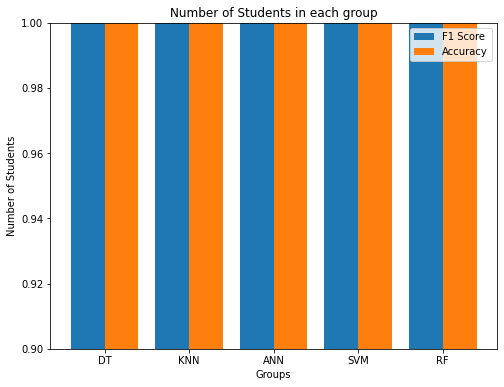

In [100]:
X = ['DT','KNN','ANN','SVM', 'RF']

f1 = [DT_metrics2['test_f1'], KNN_metrics2['test_f1'], ANN_metrics2['test_f1'],
       SVM_metrics2['test_f1'], RF_metrics2['test_f1']]
f1 = np.mean(f1, axis=1)

acc = [DT_metrics2['test_accuracy'], KNN_metrics2['test_accuracy'], ANN_metrics2['test_accuracy'],
      SVM_metrics2['test_accuracy'], RF_metrics2['test_accuracy']]
acc = np.mean(acc, axis=1)

X_axis = np.arange(len(X))
  
plt.figure(figsize=(8,6))
plt.bar(X_axis - 0.2, f1, 0.4, label = 'F1 Score')
plt.bar(X_axis + 0.2, acc, 0.4, label = 'Accuracy')


plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.ylim(0.9, 1)
plt.show()